In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA 

In [3]:
n = 100
ma_params = [0.4, -0.2]  #이동평균 개수
residuals = np.random.normal(0, 1, n)  #전차 생성

# MA(2) 모델 생성
data = [0, 0]
for i in range(2,n) :
    data.append(ma_params[0] * residuals[i-1] + ma_params[1] + residuals[i-2] + residuals[1])
df = pd.DataFrame({
    'Value' : data
})

print(df)

       Value
0   0.000000
1   0.000000
2   1.203435
3   0.601194
4  -0.578009
..       ...
95  0.709591
96  0.730493
97  0.731187
98  1.727360
99 -0.659031

[100 rows x 1 columns]


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -133.948
Date:                Wed, 31 May 2023   AIC                            275.896
Time:                        17:44:52   BIC                            286.317
Sample:                             0   HQIC                           280.114
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3666      0.123      2.988      0.003       0.126       0.607
ma.L1          0.3576      0.100      3.580      0.000       0.162       0.553
ma.L2         -0.0426      0.118     -0.360      0.7

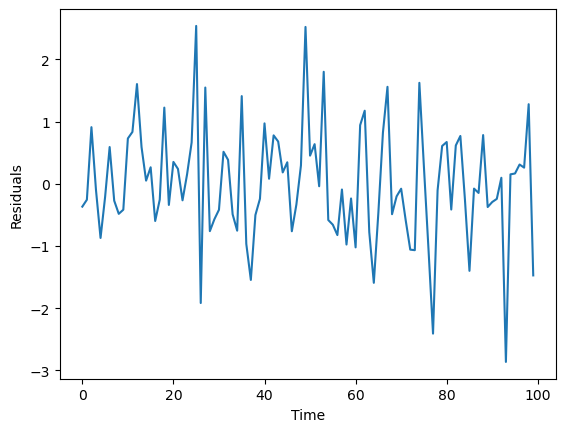

In [6]:
model = ARIMA(df['Value'], order=(0,0,2))
results = model.fit()

print(results.summary())

# 잔차 시계열 그래프 출력
plt.plot(results.resid)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()